# Series de tiempo

Las series de tiempo son datos estructurados como una variable numérica que evoluciona en el tiempo, a intervalos regulares. El PBI, el tipo de cambio, la Inflación, el nivel de exportaciones, la temperatura, la cantidad de llamadas a un call center, etc son todas variables que se pueden tratar como series de tiempo.

En https://datos.gob.ar/series podés buscar series de tiempo publicadas por distintos organismos de la Administración Pública Nacional y usar el link al CSV para leerlos directamente desde python con `pandas`.

Por ejemplo: si vas a https://datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27 podés copiar la URL a un archivo CSV que tiene la evolución del precio de la papa y de la picada común (https://apis.datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27&limit=5000&format=csv ).


## Librerías

`pandas` es la principal librería de análisis de datos en python. Permite leer todo tipo de formatos tabulares en un `DataFrame` (objeto principal de la librería) desde el cual luego se pueden realizar todo tipo de transformaciones, procesamientos y graficar fácilmente.

In [35]:
import pandas as pd

`matplotlib` es una librería de gráficos de python de uso muy difundido, que se usa en `pandas`.

In [36]:
# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

## DataFrame

In [69]:
# tomamos los datos del Estimador Mensual de la Actividad Económica (consideramos 3 series EMAE/EMAE desestacionalizado/EMAE tendencia ciclo)
emae = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=143.3_NO_PR_2004_A_21,143.3_NO_PR_2004_A_31,143.3_NO_PR_2004_A_28&limit=5000&format=csv")

In [70]:
# para ver las primeras 5 filas.
emae.head()

,indice_tiempo,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
0,2004-01-01,92.627506,98.446441,96.045810
1,2004-02-01,90.186179,98.285919,96.644956
2,2004-03-01,101.883298,97.491231,97.307190
3,2004-04-01,102.567430,95.530506,97.999021
4,2004-05-01,109.877504,96.658178,98.719853


In [71]:
# para ver las últimas filas
emae.tail()

,indice_tiempo,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
183,2019-04-01,151.533486,142.176725,141.763216
184,2019-05-01,163.989273,142.138694,141.763579
185,2019-06-01,149.388197,141.373327,141.794051
186,2019-07-01,146.336567,143.242009,141.855292
187,2019-08-01,140.616950,141.759004,141.950409


In [72]:
# para ver los tipos que pandas infirió al leer los datos
emae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 4 columns):
indice_tiempo                      188 non-null object
indice_serie_original              188 non-null float64
indice_serie_desestacionalizada    188 non-null float64
indice_serie_tendencia_ciclo       188 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.0+ KB


In [73]:
#Conocer la dimension del dataframe. Se muestra como (filas,columnas)
emae.shape

(188, 4)

In [74]:
#Para conocer la cantidad de datos nulos en cada una de las series incluídas en el dataframe
col= emae.columns.tolist()

"Cantidad de valores nulos en {}: {}".format(col, emae[col].isnull().sum())

"Cantidad de valores nulos en ['indice_tiempo', 'indice_serie_original', 'indice_serie_desestacionalizada', 'indice_serie_tendencia_ciclo']: indice_tiempo                      0\nindice_serie_original              0\nindice_serie_desestacionalizada    0\nindice_serie_tendencia_ciclo       0\ndtype: int64"

In [15]:
#Información estadística sobre los índices elegidos
emae.describe()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
count,188.000000,188.000000,188.000000
mean,135.528642,135.389883,135.253178
std,17.197321,15.254914,15.115435
min,90.186179,95.530506,96.045810
25%,126.216451,126.362721,126.323272
50%,139.162697,142.461288,142.915650
75%,147.015102,146.797387,146.559516
max,168.886101,152.634288,150.991262


In [16]:
# Mostrar el estado de las 3 series cuando una de ellas ("indice_serie_tendencia_ciclo" en éste ejemplo) toma su valor máximo.
emae[emae.indice_serie_tendencia_ciclo==emae.indice_serie_tendencia_ciclo.max()]

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2017-10-01,148.957629,151.549006,150.991262


O incluso aplicar filtros temporales.

In [17]:
emae[emae.index > "2018-01-01"]

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2018-02-01,138.819707,152.196783,149.575220
2018-03-01,155.744658,151.967816,148.773975
2018-04-01,153.299442,147.126689,147.868018
2018-05-01,159.612280,143.653125,146.908554
2018-06-01,149.014861,142.569448,145.948854
2018-07-01,145.631419,143.415129,145.039495
2018-08-01,146.153000,146.417770,144.223219
2018-09-01,137.749724,142.893958,143.527692
2018-10-01,142.965337,144.251490,142.964751


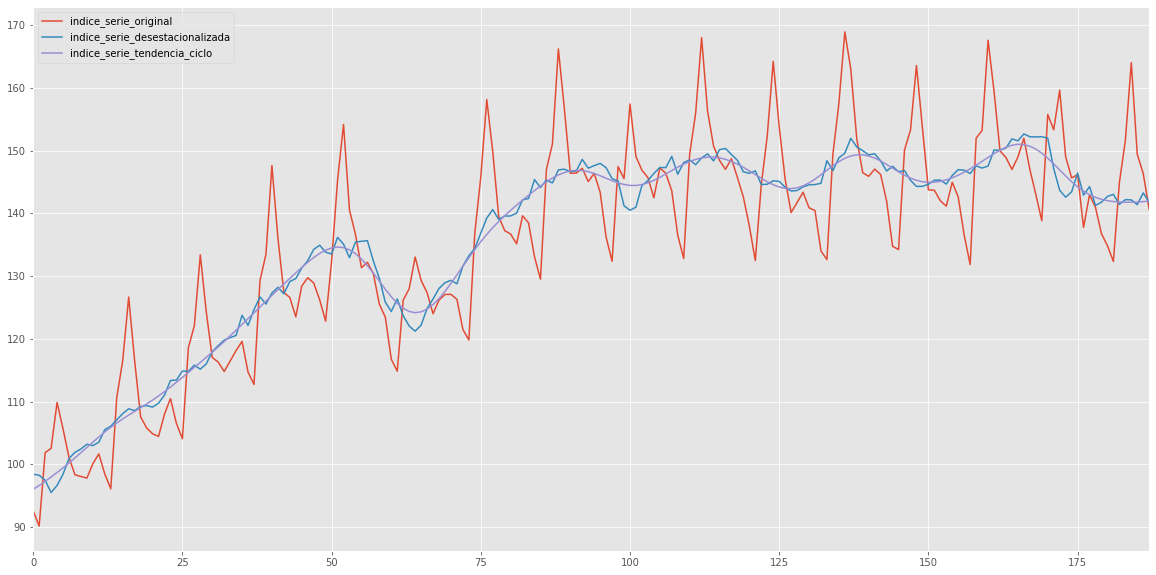

In [64]:
emae.plot(alpha=1, figsize=(20, 10));

Al leer una tabla nueva, por default, si no se especifica cual es el campo que funcionaría como índice, la librería `pandas` asigna uno numérico.  Esto es lo que nos pasó al crear la tabla "emae" y al verlo representado en un gráfico vemos que los índices son asignados a un número en lugar de a una fecha en particular. 

*¿Que deberíamos hacer entonces?* 
En primer lugar transformar el campo `indice_tiempo` (que está en formato fecha) y por último asignarlo como índice de la tabla.

In [65]:
#transforma todos los registros del campo "indice_tiempo" en fechas
emae["indice_tiempo"] = pd.to_datetime(emae["indice_tiempo"])
# convertimos al campo "indice_tiempo" en el índice de la tabla
emae = emae.set_index("indice_tiempo")
# ahora es de tipo fecha y tiene el rol de índice
emae.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2004-01-01 to 2019-08-01
Data columns (total 3 columns):
indice_serie_original              188 non-null float64
indice_serie_desestacionalizada    188 non-null float64
indice_serie_tendencia_ciclo       188 non-null float64
dtypes: float64(3)
memory usage: 5.9 KB


In [66]:
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01-01,92.627506,98.446441,96.045810
2004-02-01,90.186179,98.285919,96.644956
2004-03-01,101.883298,97.491231,97.307190
2004-04-01,102.567430,95.530506,97.999021
2004-05-01,109.877504,96.658178,98.719853


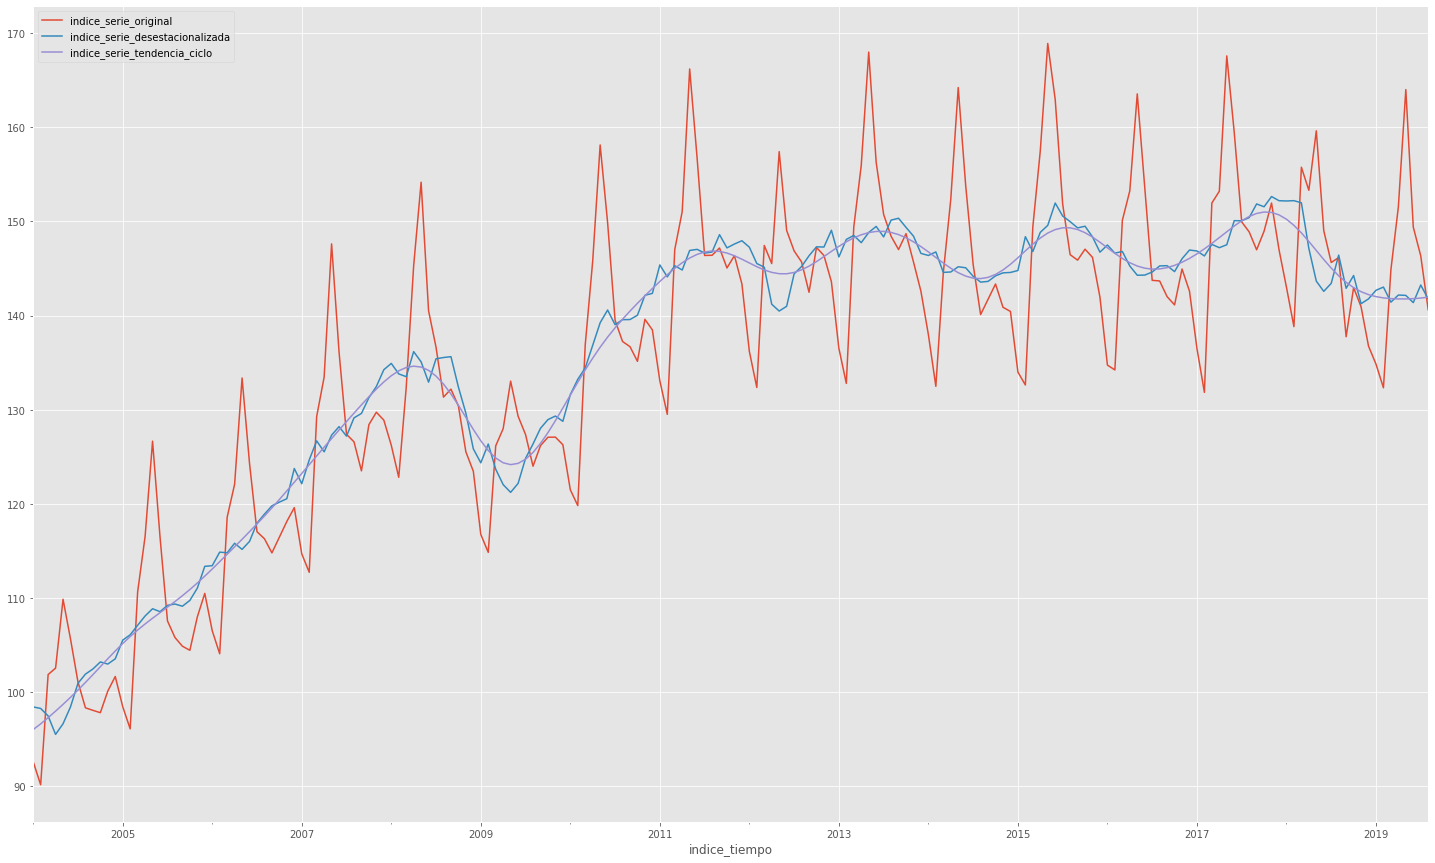

In [11]:
emae.plot(figsize=(25,15))

Setear un índice, permite localizar valores puntuales más fácilmente. Los valores del índice y los nombres de las columnas actúan de "coordenadas" de la tabla.

* Ej1: si quisieramos obtener el índice de la serie original correspondiente a abril 2018, podríamos hacerlo usando la función ".loc":

In [67]:
emae.loc["2018-04-01", "indice_serie_original"]

153.29944192230408

Un `DataFrame` se puede guardar en una gran variedad de formatos.

In [34]:
emae.to_csv("./datos/emae.csv", encoding="utf8")
emae.to_excel("./datos/emae.xlsx", encoding="utf8")
emae.to_html("./datos/emae.html")
emae.to_stata("./datos/emae.dta")

NotImplementedError: Data type period[M] not supported.

### **Ejercicio1:** 
buscar la serie del tipo de cambio del Banco Nación (BNA vendedor), generar un índice de tiempo, guardar los datos en CSV e imprimir el valor del 1 de Enero de 2019 en el notebook.

## Gráficos simples con pandas

A continuación representamos en un gráfico de líneas sencillo la evolución en el tiempo de los índices EMAE llamados en el dataframe "emae".

Para iniciar sólo le agregamos el título con el parámetro "title" y los pixeles requeridos para el gráfico con el parámetro "figsize".

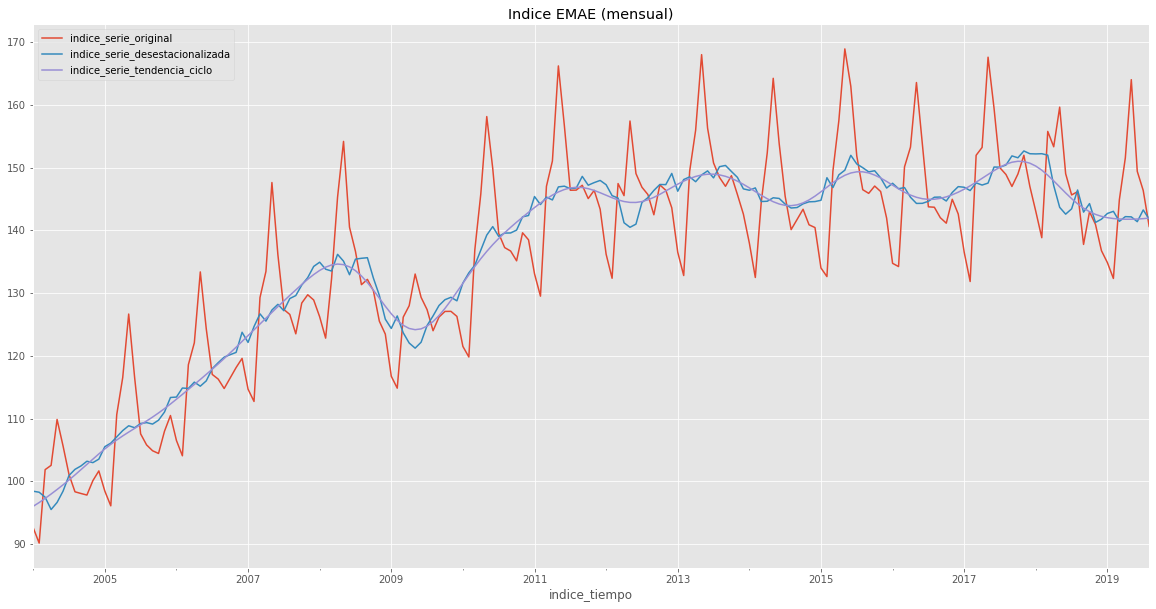

In [31]:
emae.plot(figsize=(20,10), title="Indice EMAE (mensual)");


Por default, pandas grafica todas las columnas numéricas como "líneas" pero existen otros tipos de gráficos que se pueden usar.
Se podría además realizar gráficos de áreas, de barras y de dispersión.


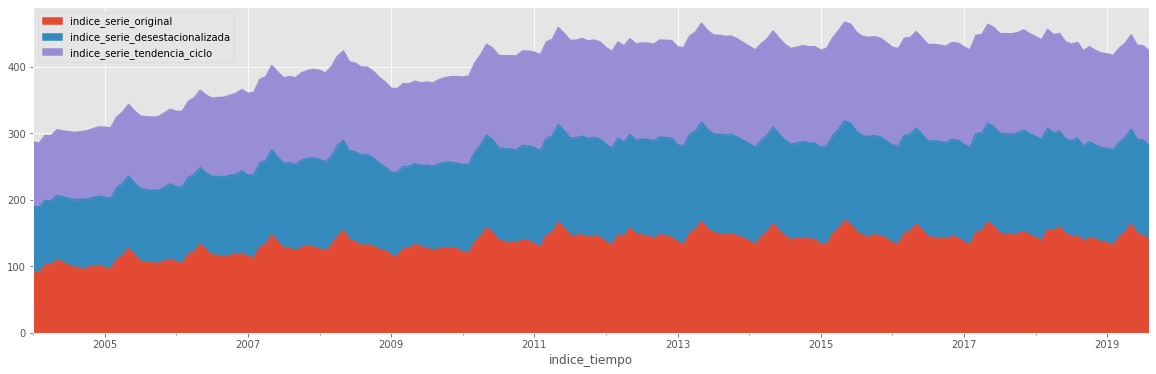

In [32]:
#Un ejemplo de gráfico de áreas
emae.plot(kind="area", figsize=(20,6));

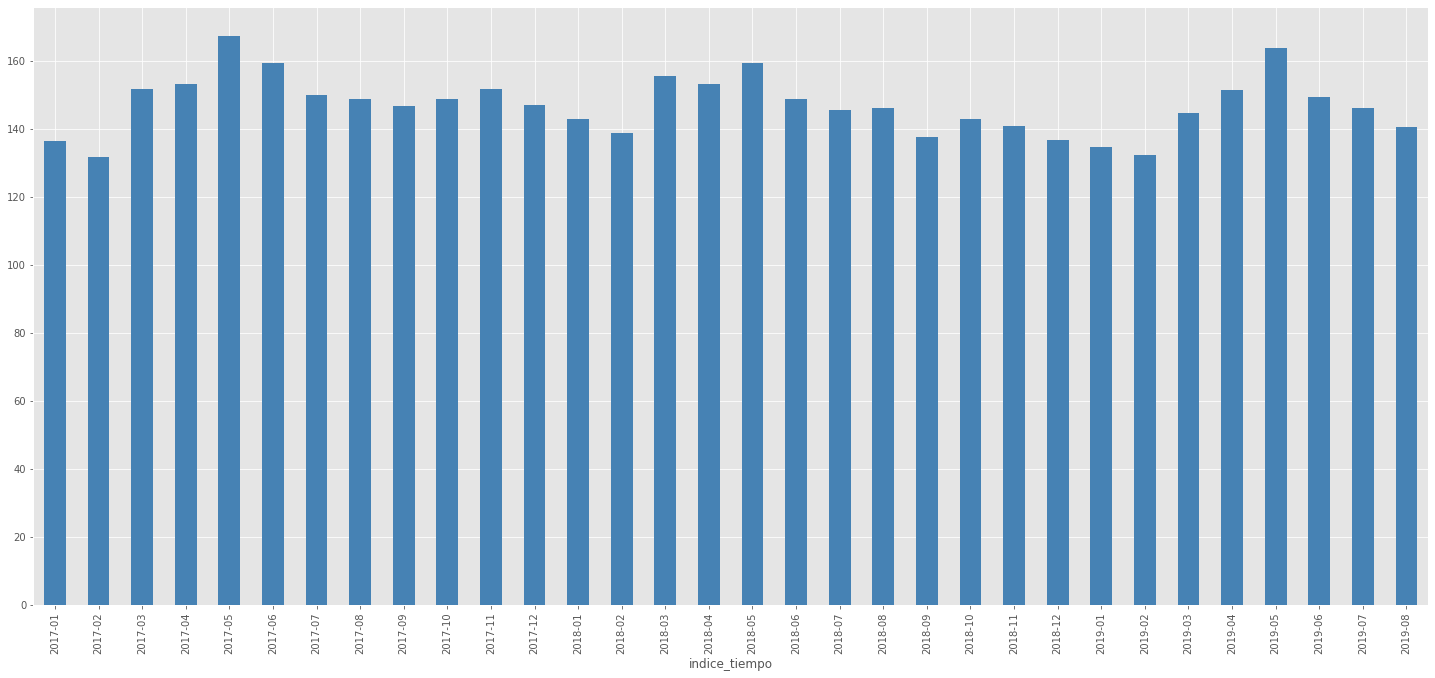

In [33]:
emae[emae.index > "20161201"].indice_serie_original.plot(figsize=(25,11), kind="bar", color="steelblue");

Si bien el dataframe es de frecuencia mensual, en el gráfico, el índice de tiempo (eje x) se muestra como una . Para que se muestre sólo lo necesario para la frecuencia temporal que tiene, se puede convertir el índice a "períodos" en lugar de fechas completas.

In [22]:
#tabla inicial Indice temporal completo
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01-01,92.627506,98.446441,96.045810
2004-02-01,90.186179,98.285919,96.644956
2004-03-01,101.883298,97.491231,97.307190
2004-04-01,102.567430,95.530506,97.999021
2004-05-01,109.877504,96.658178,98.719853


In [23]:
emae.index = emae.index.to_period()
#Esto permite ver la tabla "emae" sólo con la info necesaria (dada la frecuencia temporal con la que contaba la tabla) 
#del índice, es decir permite ver sólo el mes y año. Al ser la medición el mismo día del mes, no era necesario mostrarlo.
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01,92.627506,98.446441,96.045810
2004-02,90.186179,98.285919,96.644956
2004-03,101.883298,97.491231,97.307190
2004-04,102.567430,95.530506,97.999021
2004-05,109.877504,96.658178,98.719853


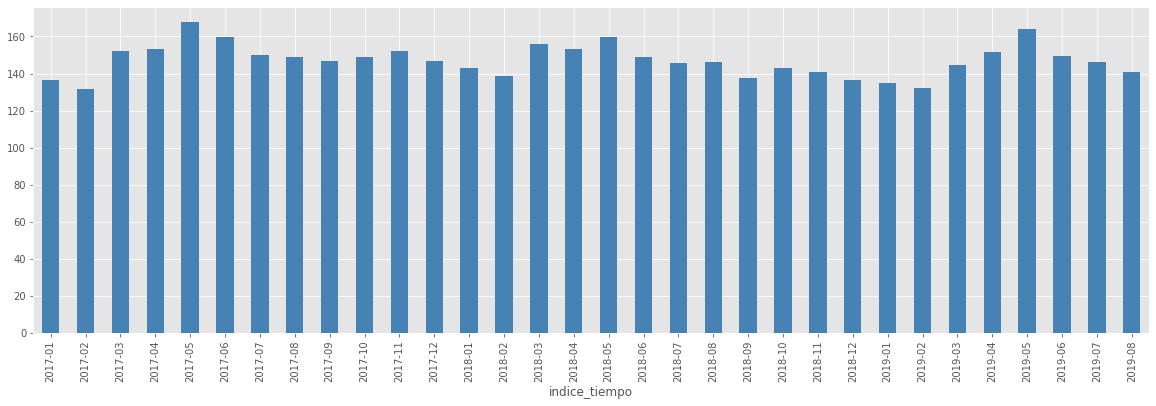

In [24]:
emae[emae.index > "201612"].indice_serie_original.plot(figsize=(20,6), kind="bar", color="steelblue")

*Que simboliza una variable desestacionalizada?*


Según los métodos de Harvard la mayoría de las series presentan cuatro tipos de variaciones
* Tendencia del desarrollo: Variaciones que presentan cierta tendencia general
* Fluctuaciones cíclicas o de la situación económica que corresponden a los ciclos económicos generales
* Fluctuaciones estacionales que aparecen en series trimestrales o mensuales
* Fluctuaciones irregulares.

Antes de sacar conclusiones en el análisis de variables, es necesario desestacionalizarlas (sacar todo el ruido de las mediciones) y así tomar mejores decisiones ("Un heladero que festeja haber vendido mayor cantidad de cucuruchos en enero que en julio es candidato a fundirse").

*Cómo podemos armar una? Que necesitamos?*

Lo que se recomienda es aislar éstas tendenciass y fluctuaciones de la serie original.

Para ésto pueden utilizarse coeficientes o ponderadores por mes que nos permita eliminar el ruido (Ej:  tomar la información de, digamos, los últimos diez años, sumar los meses de enero, los de febrero, etcétera. Luego expresar la suma de los eneros como proporción de la suma de todos los meses, repitiendo el procedimiento con cada mes. Obteniendo así coeficientes que, aplicados a los valores observados, generan los correspondientes valores desestacionalizados).

Uno de los métodos más modernos, es ARIMA el cual corrige cada observación mensual por el número de días hábiles y para ajustar lo que ocurrió en enero último, le asigna más importancia a los eneros anteriores, que lo ocurrido a comienzos del siglo XX.




### **Ejercicio2:** 
Graficar las variaciones del emae (serie original) como cambio porcentual respecto de 12 meses atrás (variación porcentual interanual) en un gráfico de barras con el mismo color desde 2016 en adelante.

## Correlación y gráficos múltiples

Ahora vas a ver cómo buscar variables que expliquen o correlacionen con una variable de interés a partir de la exploración visual y luego del análisis de correlación. En este caso vamos a descargar distintas componentes sectoriales del nivel de actividad para entender cuáles explican o correlacionan mejor con el nivel de actividad general.

In [26]:
# descargamos el emae general, construcción, industria, comercio, pesca, agricultura y hotelería
nivel_actividad = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=11.3_VMATC_2004_M_12,143.3_NO_PR_2004_A_21,11.3_VMASD_2004_M_23,11.3_VIPAA_2004_M_5,11.3_ISOM_2004_M_39,11.3_P_2004_M_20,11.3_AGCS_2004_M_41&limit=1000&format=csv")


In [27]:

# generamos el índice de tiempo
nivel_actividad["indice_tiempo"] = pd.to_datetime(nivel_actividad["indice_tiempo"])
nivel_actividad = nivel_actividad.set_index("indice_tiempo")

El tipo de los gráficos en pandas se puede especificar tanto pasando la variable `kind` como hiciste antes, como accediendo a la función `plot` como un objeto con "subfunciones".

In [28]:
nivel_actividad.head()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
indice_tiempo,,,,,,,
2004-01-01,95.938047,92.627506,91.454610,42.547868,65.995350,108.411682,92.065338
2004-02-01,98.853388,90.186179,89.424852,62.440771,64.926598,103.448256,91.464718
2004-03-01,103.124529,101.883298,101.426433,174.084646,110.666559,101.061842,109.127780
2004-04-01,95.815492,102.567430,98.437312,153.877638,150.065920,93.242999,99.420141
2004-05-01,97.994567,109.877504,100.353138,132.357664,209.388076,90.985260,100.532744


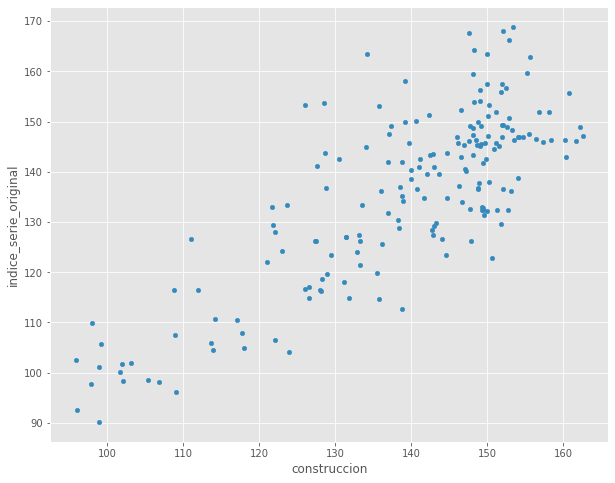

In [29]:
nivel_actividad.plot.scatter("construccion", "indice_serie_original", figsize=(10,8))

`matplotlib` permite generar un gráfico compuesto de "subgráficos" con la función `plt.subplots()`

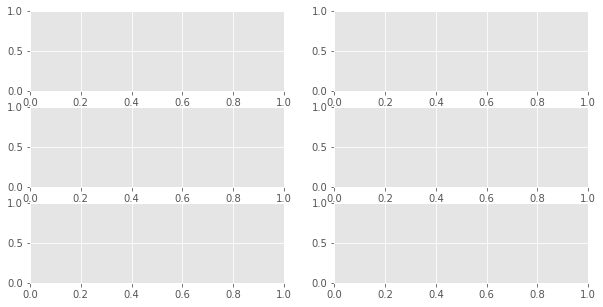

In [30]:
# genera un lienzo con 4 subgráficos vacíos
fig, axes = plt.subplots( ncols=2, figsize=(10, 5), nrows=3)

Dentro de la misma celda donde se crea el lienzo de subgráficos, deben crearse y asignarse a los "axes" c/u de los subgráficos.

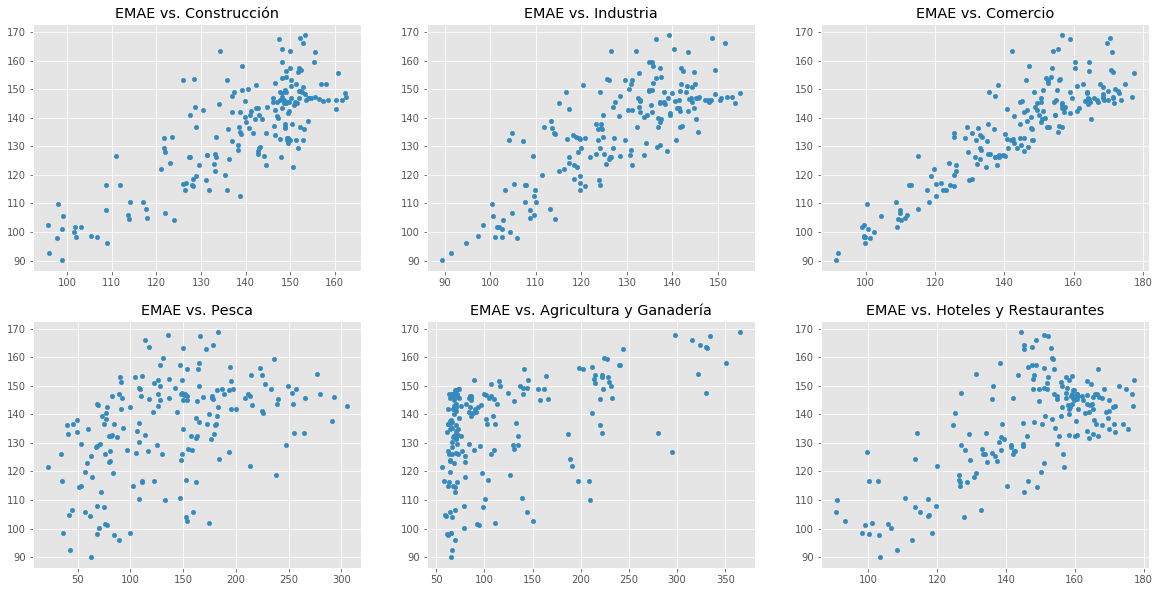

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

# elimina los labels de los ejes para que se vea mejor
for row in axes:
    for ax in row:
        pass
        ax.set_xlabel("")
        ax.set_ylabel("")


La construcción, la industria, el comercio y los servicios de hotelería y restaurantes parecen correlacionar fuertemente con el nivel de actividad general, mientras que la pesca y el sector agropecuario casi no muestran relación alguna! Podés mirar la matriz de correlaciones de la tabla para corroborar esto.

In [30]:
nivel_actividad.corr()

NameError: name 'nivel_actividad' is not defined

Si ves la pesca y el sector agropecuario en el mismo gráfico con la serie original, es evidente que estos dos sectores tienen una estacionalidad mucho más pronunciada que el nivel general de actividad, y por esto tienen una baja correlación.

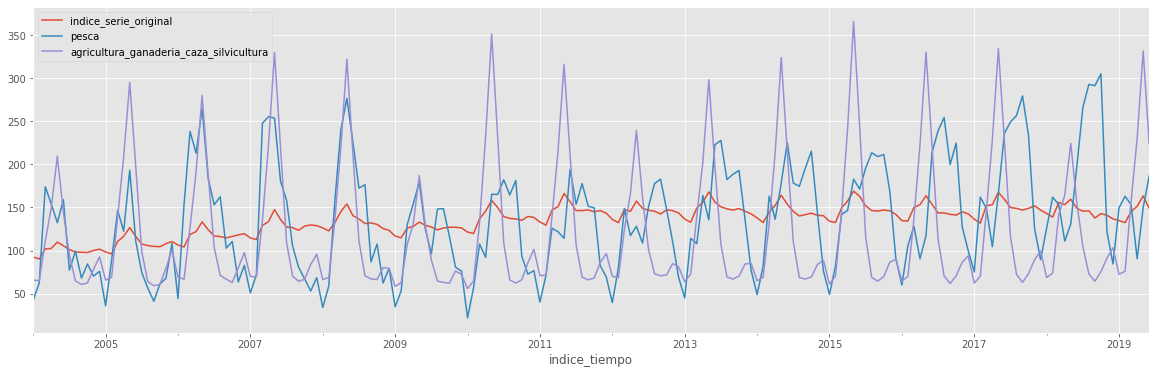

In [33]:
nivel_actividad[["indice_serie_original", "pesca", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Probablemente debas chequear si existe relación cuando se consideran las variaciones del índice, en lugar del valor absoluto. Pero el bloque de código era bastante engorroso para estar probando ágilmente esas transformaciones y cambiar rápidamente. Deberías poner ese bloque dentro de una función, cuyos argumentos de entrada sean aquellas cosas que quieras cambiar.

In [34]:
def generate_emae_scatters(nivel_actividad):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

    nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
    nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
    nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

    nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
    nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
    nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

    # elimina los labels de los ejes para que se vea mejor
    for row in axes:
        for ax in row:
            ax.set_xlabel("")
            ax.set_ylabel("")
    
    return axes


Las variaciones mensuales del EMAE tienen una fuerte correlación con las variaciones mensuales del sector agropecuario!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002162915FD30>,
      dtype=object)

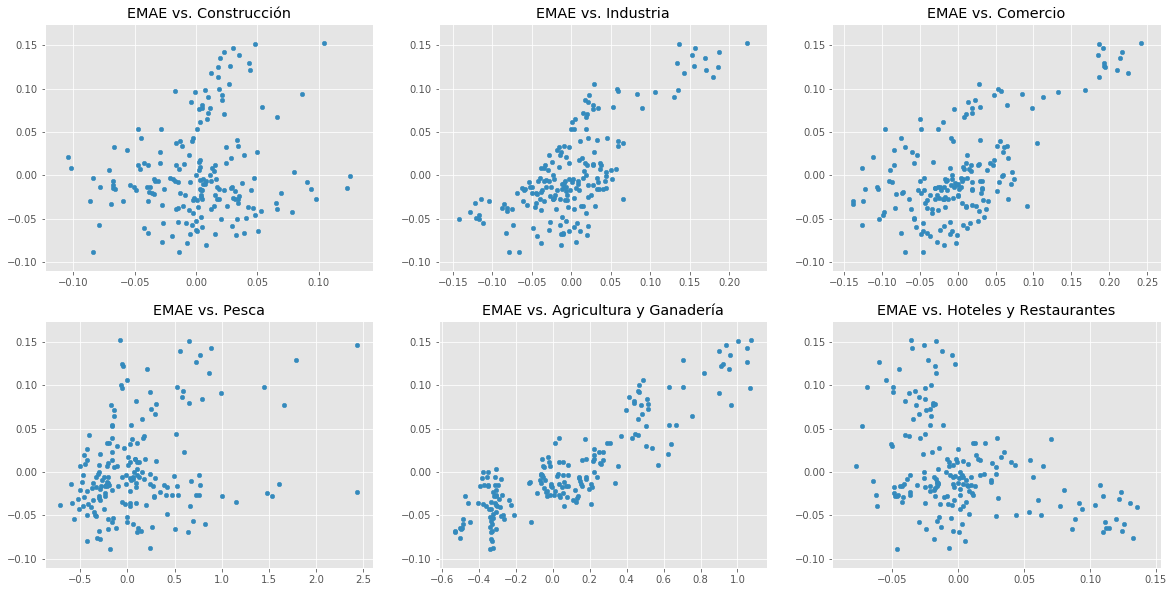

In [35]:
generate_emae_scatters(nivel_actividad.pct_change(1))

#Tomar en cuenta que "nivel_actividad.pct_change(1)" devuelve la variación porcentual intermensual (por brindar la tabla en cada registro datos mensuales)


In [36]:
nivel_actividad.pct_change(1).corr()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
construccion,1.000000,0.171260,0.190589,0.103211,-0.081044,0.158274,0.426383
indice_serie_original,0.171260,1.000000,0.755119,0.313937,0.890127,-0.408526,0.661074
industria_manufacturera,0.190589,0.755119,1.000000,0.334003,0.572889,-0.186205,0.835421
pesca,0.103211,0.313937,0.334003,1.000000,0.306197,-0.389818,0.366380
agricultura_ganaderia_caza_silvicultura,-0.081044,0.890127,0.572889,0.306197,1.000000,-0.517601,0.451790
hoteles_restaurantes,0.158274,-0.408526,-0.186205,-0.389818,-0.517601,1.000000,-0.125674
comercio_mayorista_minorista_reparaciones,0.426383,0.661074,0.835421,0.366380,0.451790,-0.125674,1.000000


Las variaciones en el sector agropecuario casi siempre empujan a las variaciones en el nivel general (que obviamente ocurren en menor magnitud) ya que es un sector con una alta incidencia en la producción total en Argentina. No es este el caso de la pesca.

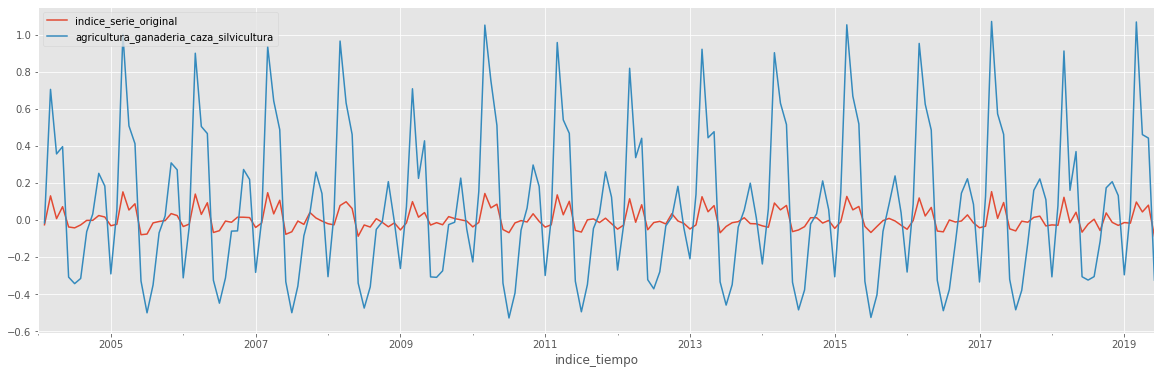

In [37]:
nivel_actividad.pct_change(1)[["indice_serie_original", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Si querés seguir la evolución de mediano plazo de la producción agropecuaria, una forma sencilla de remover el ruido estacional es aplicar un promedio móvil de 12 meses. Para esto podés usar la función `rolling` que te permite elegir una ventana de X períodos sobre la cual hacer un cálculo o una agregación.

In [38]:
#Insertamos una nueva columna con el promedio de los últimos 12 meses en la columna "agri_promedio_movil_12"
nivel_actividad["agri_promedio_movil_12"] = nivel_actividad.agricultura_ganaderia_caza_silvicultura.rolling(12).mean()
nivel_actividad.head()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones,agri_promedio_movil_12
indice_tiempo,,,,,,,,
2004-01-01,95.938047,92.627506,91.454610,42.547868,65.995350,108.411682,92.065338,NaN
2004-02-01,98.853388,90.186179,89.424852,62.440771,64.926598,103.448256,91.464718,NaN
2004-03-01,103.124529,101.883298,101.426433,174.084646,110.666559,101.061842,109.127780,NaN
2004-04-01,95.815492,102.567430,98.437312,153.877638,150.065920,93.242999,99.420141,NaN
2004-05-01,97.994567,109.877504,100.353138,132.357664,209.388076,90.985260,100.532744,NaN


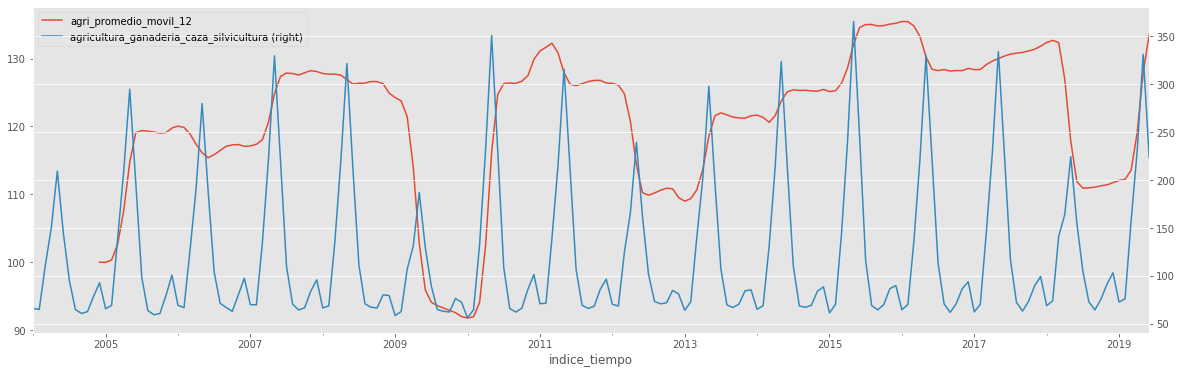

In [39]:
nivel_actividad[["agri_promedio_movil_12", "agricultura_ganaderia_caza_silvicultura"]].plot(
    figsize=(20,6), secondary_y="agricultura_ganaderia_caza_silvicultura")

**Ejercicio:** chequear la correlación entre las variaciones _interanuales_ (12 meses) del EMAE y sus componentes sectoriales.

## Ejercicio 4

**Ejercicio para hacer en casa:** crear un simple tablero de seguimiento de variables de coyuntura usando _subplots_ que contenga la evolución del tipo de cambio BNA vendedor (promedio móvil 30 días), la tasa de interés de política monetaria, la inflación interanual mensual (`pct_change(12)`, la expectativa de inflación de los próximos 12 meses, las variaciones porcentuales mensuales del nivel de actividad (EMAE) y el saldo comercial mensual (promedio móvil 3 meses).